1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance matrix:

 [[ 0.96372918  0.90174382  2.82920219]
 [ 0.90174382 10.69014271 12.49363035]
 [ 2.82920219 12.49363035 18.15203473]]

Determinant of the covariance matrix: -7.883732228289139e-14 



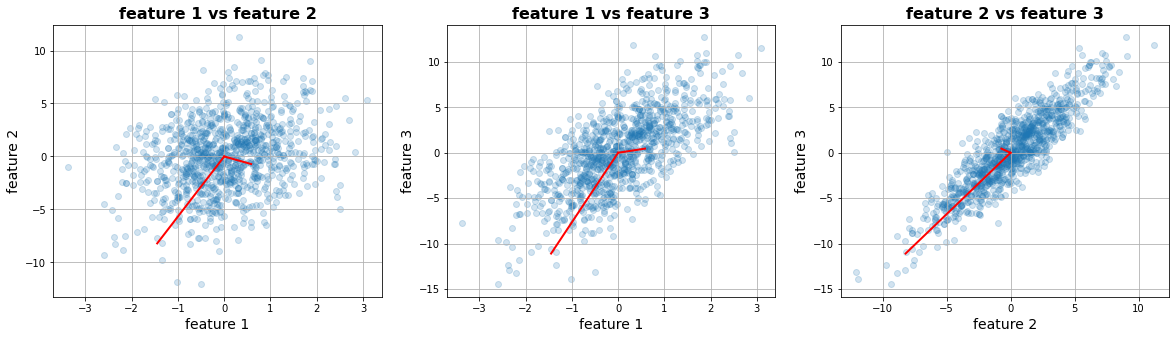


Data in the new basis:


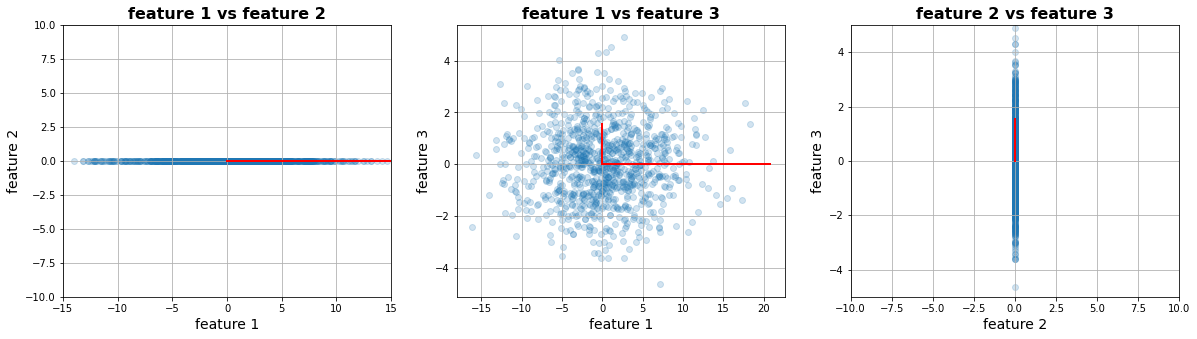

In [8]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

N = 1000
x1 = np.random.normal(loc=0.0, scale=1.0, size=N)
x2 = x1 + np.random.normal(loc=0.0, scale=3.0, size=N)
x3 = 2*x1 + x2
F = np.zeros((3,N))
F[0,:] = x1
F[1,:] = x2
F[2,:] = x3

C = np.cov(F)
print('Covariance matrix:\n\n',C)
print("\nDeterminant of the covariance matrix:", la.det(C), '\n')

l, V  = la.eig(C)
l = np.real_if_close(l)
lam = np.diag(l)
U, S, Vt = la.svd(C)
S = np.real_if_close(S)
D = np.diag(S)
eig_dec = np.dot(V, np.dot(lam, V.T))
SVD = np.dot(U, np.dot(D, Vt))

sort_l = np.sort(l)
sort_l = sort_l[::-1]
total_variability = 0
number_of_features = 0
for i in range(len(sort_l)):
    if total_variability >= 99:
        break
    total_variability += abs(100*(sort_l[i]/lam.trace()))
    number_of_features +=1
    
fig1, ax = plt.subplots(1,3, figsize=(20,5))
scale_factor = 0.5

ax[0].scatter(F[0,:], F[1,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
ax[0].set_title('feature 1 vs feature 2',size=16,fontweight='bold')
ax[0].set_xlabel('feature 1',size=14)
ax[0].set_ylabel('feature 2',size=14)
ax[0].grid(True)
ax[1].scatter(F[0,:], F[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[1].set_title('feature 1 vs feature 3',size=16,fontweight='bold')
ax[1].set_xlabel('feature 1',size=14)
ax[1].set_ylabel('feature 3',size=14)
ax[1].grid(True)
ax[2].scatter(F[1,:], F[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[2].set_title('feature 2 vs feature 3',size=16,fontweight='bold')
ax[2].set_xlabel('feature 2',size=14)
ax[2].set_ylabel('feature 3',size=14)
ax[2].grid(True)

plt.show()
Fp = np.dot(V.T, F)
print('\nData in the new basis:')
fig2, ax = plt.subplots(1,3, figsize=(20,5))
scale_factor = 0.75

ax[0].scatter(Fp[0,:], Fp[1,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*len(l))):
    ax[0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
ax[0].set_title('feature 1 vs feature 2',size=16,fontweight='bold')
ax[0].set_xlabel('feature 1',size=14)
ax[0].set_ylabel('feature 2',size=14)
ax[0].axis([-15, 15, -10, 10])
ax[0].grid(True)

ax[1].scatter(Fp[0,:], Fp[2,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*len(l))):
    ax[1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
ax[1].set_title('feature 1 vs feature 3',size=16,fontweight='bold')
ax[1].set_xlabel('feature 1',size=14)
ax[1].set_ylabel('feature 3',size=14)
ax[1].grid(True)

ax[2].scatter(Fp[1,:], Fp[2,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*len(l))):
    ax[2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
ax[2].set_title('feature 2 vs feature 3',size=16,fontweight='bold')
ax[2].set_xlabel('feature 2',size=14)
ax[2].set_ylabel('feature 3',size=14)
ax[2].axis([-10, 10, -5, 5])
ax[2].grid(True)

plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [7]:
import numpy as np
from scipy import linalg 

N=1000
x1 = np.random.normal(0, 1, size = N)
x2 = x1 + np.random.normal(0, 3, size = N)
x3 = (2 * x1) + x2
data = np.vstack((x1, x2, x3))
noise = np.random.normal(size = (N, 3), scale = 1/40)
noised_data = data + np.sum(noise.T)

cov_n = np.cov(noised_data)

l_n, V_n = linalg.eig(cov_n)
index = np.argsort(l_n,axis=-1)[::-1] # setting the order of eigendecomposition to fit with svd
V_n = V_n[:, index]
l_n = l_n[index]
l_n = np.real_if_close(l_n)
print("Eigendecomposition E.Vectors :\n", V_n)
print("\nEigendecomposition E.Values :\n", l_n)

V_svd_n, l_svd_n, Vt_svd_n = linalg.svd(cov_n)

print("\nSVD E.Vectors:\n", V_svd_n)
print("\nSVD E.Values: ", l_svd_n)

print("\nE.Vectors yield the same result :", np.allclose(V_n, V_svd_n))
print("E.Values yield the same result :", np.allclose(l_n, l_svd_n))


Eigendecomposition E.Vectors :
 [[-0.12886739  0.56278462 -0.81649658]
 [-0.56040018 -0.7206143  -0.40824829]
 [-0.81813497  0.40495494  0.40824829]]

Eigendecomposition E.Values :
 [2.59395655e+01 1.89886902e+00 1.16083547e-15]

SVD E.Vectors:
 [[-0.12886739  0.56278462 -0.81649658]
 [-0.56040018 -0.7206143  -0.40824829]
 [-0.81813497  0.40495494  0.40824829]]

SVD E.Values:  [2.59395655e+01 1.89886902e+00 7.58665835e-16]

E.Vectors yield the same result : True
E.Values yield the same result : True


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 